<a href="https://colab.research.google.com/github/lawrenceN/ASPBaseApp/blob/master/BIT_Training_a_Simple_Image_Classfier_Using_Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training a Simple Image Classifier Using CNN

**Objective:** To create a CNN for classification of handwritten digits:



1.   Load in the MNIST dataset and examine it.


*   Use any library to load the MNIST (in Tensorflow and PyTorch Modules) dataset 
*   Inspect the data: size, shape and quantity.
*   View random samples using either OpenCV or Matplotlib and observe the complexity of the images. 


2.   Using numpy or other libraries prepare your dataset for training
* Ensure the format or shape of the data is appropriate for input into your model (one-hot encoding is needed for the labels)
* Ensure data types are correct and that data is normalized

3. Create a CNN with the following specifications
* input dimensions of 28 x 28 x 1
* Two Convolution Layers (kernel Size 3*3). The first with 64 filters, the second with 32.  Use the ReLu as the activation Layer. 
* Max pooling of size 2*2
* Dropout Rate of 0.25
* Add a Dense Layer comprising of 128 outputs
*Add another Dropout Layer that indicates the class probabilities
* Add the final Dropout Layer that indicates the class probabilities
4. Train the CNN on the MNIST dataset 
* For at least 10 Epochs using batch size of 32
5. Plot graphs showing how your training and validation loss and accuracy changed with respect to the Epochs completed. 
6.Save your model, you will be using it for the second milestone
7. Test the model on some random samples from the test dataset. 




# Loading the Data

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
# load the dataset
(x_train, y_train),(x_test,y_test)=mnist.load_data()

In [ ]:
#display the dataset
print('Initial shape or dimensions of the x_train',str(x_train.shape) +'\n')
print('Number of samples in our training data: '+ str(len(x_train)))
print('Number of labels in our training data:  '+ str(len(y_train)))
print('Number of samples in our test data: '+ str(len(x_test)))
print('Number of labels in our test data: '+ str(len(y_test))+'\n')

print('Dimensions of x_train: '+ str(x_train[0].shape))
print('Labels in x_train: '+ str(y_train.shape)+'\n')
print('Dimensions of x_test: '+str(x_test[0].shape))
print('Labels  in y_test: '+ str(y_test.shape))


Initial shape or dimensions of the x_train (60000, 28, 28)

Number of samples in our training data: 60000
Number of labels in our training data:  60000
Number of samples in our test data: 10000
Number of labels in our test data: 10000

Dimensions of x_train: (28, 28)
Labels in x_train: (60000,)

Dimensions of x_test: (28, 28)
Labels  in y_test: (10000,)


# Looking at some images in the dataset

In [ ]:
#importing matplotlib
import matplotlib.pyplot as plt
import numpy as np


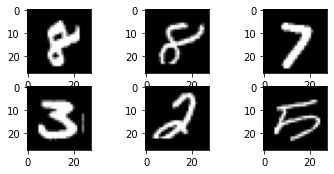

In [ ]:
# plots 6 images, note subplot's arguments are nrows, ncols and index
# we set the color map to grey since our image dataset is grayscale
plt.subplot(331)
random_num=np.random.randint(0,len(x_train))
_=plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))
plt.subplot(332)
random_num=np.random.randint(0,len(x_train))
_=plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(333)
random_num=np.random.randint(0,len(x_train))
_=plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(334)
random_num=np.random.randint(0,len(x_train))
_=plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(335)
random_num=np.random.randint(0,len(x_train))
_=plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(336)
random_num=np.random.randint(0,len(x_train))
_=plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.show()

# Preparing our Dataset for Keras

Keras requires our input data as a 4-Dimensional shape of (60000,28,28,1). When we initially loaded the data, x_train was (60000,28,28). We need the labels to be one-hot-encoded.

In [ ]:
#number of rows and columns
img_rows=x_train[0].shape[0]
img_cols=x_train[0].shape[1]

# getting the data in the right 'shape' needed for Keras
# We need to add a 4 th dimeniosion to our data thereby changing our
# original image shape of (60000,28,28) to (60000,28,28,1)
x_train=x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test=x_test.reshape(x_test.shape[0],img_rows,img_cols, 1)

# store the shape of the single image for future use as a variable storing 
#our input shape
input_shape=(img_rows, img_cols,1)

#change our image type to float32 data types
x_train=x_train.astype('float32') # uint8 originally
x_test=x_test.astype('float32')

#Normalize the data by changing the range form (0 to 255) to (0 to 1)
x_train/=255.0
x_test/=255.0

print('x_train shape:',x_train.shape)
print(x_train.shape[0],'train samples')
print(x_test.shape[0], 'test samples')



x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# Performing one-hot-enconding of the data labels

In [ ]:
from tensorflow.keras.utils import to_categorical
#Using the hot encode outputs
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
#let's count the number of columns in our hot encoded matrix
print('Number of Classes: '+ str(y_test.shape[1]))
num_classes = y_test.shape[1]

Number of Classes: 10


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as k
from tensorflow.keras.optimizers import SGD

#create model
model=Sequential()

#First convolution Layer, Filter size 32 which reduces our layer
#size to 26 * 26 * 32
#We use ReLU activation and specify our input_shape which is 28 x 28 x 1
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))

# Second convolution Layer, Filter size 64, which reduces our sizes to 12 x 12 x 64
model.add(Conv2D(64,(3,3), activation='relu'))

#We use Maxpooling with a kernel size of 2 * 2, this reduces our size to 12 x 12x64
model.add(MaxPooling2D(pool_size=(2,2)))

#We use a dropout P setting of 0.25 to reduce overfitting
model.add(Dropout(0.25))

# We then Flatten our tensor object before input into our Dense Layer
#Flatten operation on a tensor reshapes the tensor to have the shape that is
#Equal to the number of elements contained in tensor
# In our CNN it goes form 12 * 12 * 64 to 9216 *1
model.add(Flatten())

#We connect this layer to a fully connected/Dense layer of size 1 * 128
model.add(Dense(128, activation='relu'))

#We use another Dropout layer
model.add(Dropout(0.5))

# We create our final fully connected/ Dense layer with an output for each class
# (10) 
model.add(Dense(num_classes,activation='softmax'))

# We compile our model, this creates an object that stores the model just created
# We set out Optimizer to use Stochastic Gradient Descent (Learning rate of 0.01)
# Finally, the metrics (what we judge our performance on) to be accuracy
model.compile(loss='categorical_crossentropy',optimizer=SGD(0.01), metrics=['accuracy'])
#We use the summary function to display our model 
print(model.summary())


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

# Training our CNN

In [ ]:
batch_size=32
epochs=10
#store our results here so we can plot later
# In our fit function we specify our datasets (x_train and y_train),
# the batch size (typically 16 to 128 depending on your RAM), the number of epochs
#epochs()10 to 100) and our validation datasets (x_test and y_test)
#verbose = 1 , sets our training to output performace metrics every epoch

history = model.fit(x_train,y_train, batch_size=batch_size,epochs=epochs, verbose=1,validation_data=(x_test,y_test))
#We obtain our accuracy score using the evalute function
score=model.evaluate(x_test,y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test accuracy:',score[1])


Epoch 1/10
1875/1875 [==============================] - 159s 85ms/step - loss: 0.6189 - accuracy: 0.8051 - val_loss: 0.2047 - val_accuracy: 0.9416
Epoch 2/10
1875/1875 [==============================] - 162s 86ms/step - loss: 0.3042 - accuracy: 0.9084 - val_loss: 0.1438 - val_accuracy: 0.9563
Epoch 3/10
1875/1875 [==============================] - 166s 88ms/step - loss: 0.2326 - accuracy: 0.9293 - val_loss: 0.1065 - val_accuracy: 0.9672
Epoch 4/10
1875/1875 [==============================] - 162s 86ms/step - loss: 0.1811 - accuracy: 0.9463 - val_loss: 0.0815 - val_accuracy: 0.9747
Epoch 5/10
1875/1875 [==============================] - 164s 87ms/step - loss: 0.1485 - accuracy: 0.9560 - val_loss: 0.0691 - val_accuracy: 0.9783
Epoch 6/10
1875/1875 [==============================] - 162s 87ms/step - loss: 0.1269 - accuracy: 0.9621 - val_loss: 0.0575 - val_accuracy: 0.9817
Epoch 7/10
1875/1875 [==============================] - 161s 86ms/step - loss: 0.1106 - accuracy: 0.9667 - val_loss: 0